<div style="border-radius:10px; border:black 5px solid ; padding:20px;color:black;margin:0;font-size:30px;font-family:Roboto;text-align:center;display:fill;border-radius:5px;background: linear-gradient(to right,white, lightblue);overflow:hidden;box-shadow: 5px 5px 5px gray;"><b>Model on Airline Passeneger Satisfaction </b></div>


![Image of Airline Passenger](https://img.freepik.com/free-vector/flight-attendant-explaining-safety-instructions-passenger-airplane-belt-flat-vector-illustration-travelling-vacation-concept_74855-10064.jpg?w=1380&fit=fill)


In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px

In [2]:
ap=pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\Python\AirlinePassenegerData.csv")

In [3]:
ap.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
# checking info type

ap.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
# checking shape

ap.shape

(103904, 25)

In [6]:
#Droping Unncessary Columns

ap=ap.drop(['Unnamed: 0', 'id'],axis=1)

In [7]:
# checking any nulls are there

ap.isnull().sum()[ap.isnull().sum()>0]

Arrival Delay in Minutes    310
dtype: int64

In [8]:
# filling the nulls with mean value

mean_delay=ap["Arrival Delay in Minutes"].mean()
ap["Arrival Delay in Minutes"].fillna(mean_delay,inplace=True)

In [9]:
#Filling Obj to Int

ap.select_dtypes(include="object").columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [10]:
ap['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [11]:
# Convert categorical variables to numerical equivalents

ap['Gender'].replace({'Male':1, 'Female':0},inplace=True)
ap['Customer Type'].replace({'Loyal Customer':1, 'disloyal Customer':0},inplace=True)
ap['Type of Travel'].replace({'Personal Travel':2, 'Business travel':1},inplace=True)
ap['Class'].replace({'Eco Plus':2, 'Business':3, 'Eco':1},inplace=True)
ap['satisfaction'].replace({'neutral or dissatisfied':0, 'satisfied':1},inplace=True)

In [12]:
# converted data into numericial

ap.head(2)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,13,2,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,0,25,1,3,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0


## Here are several types of graphs are used to create, explore and understand your data:

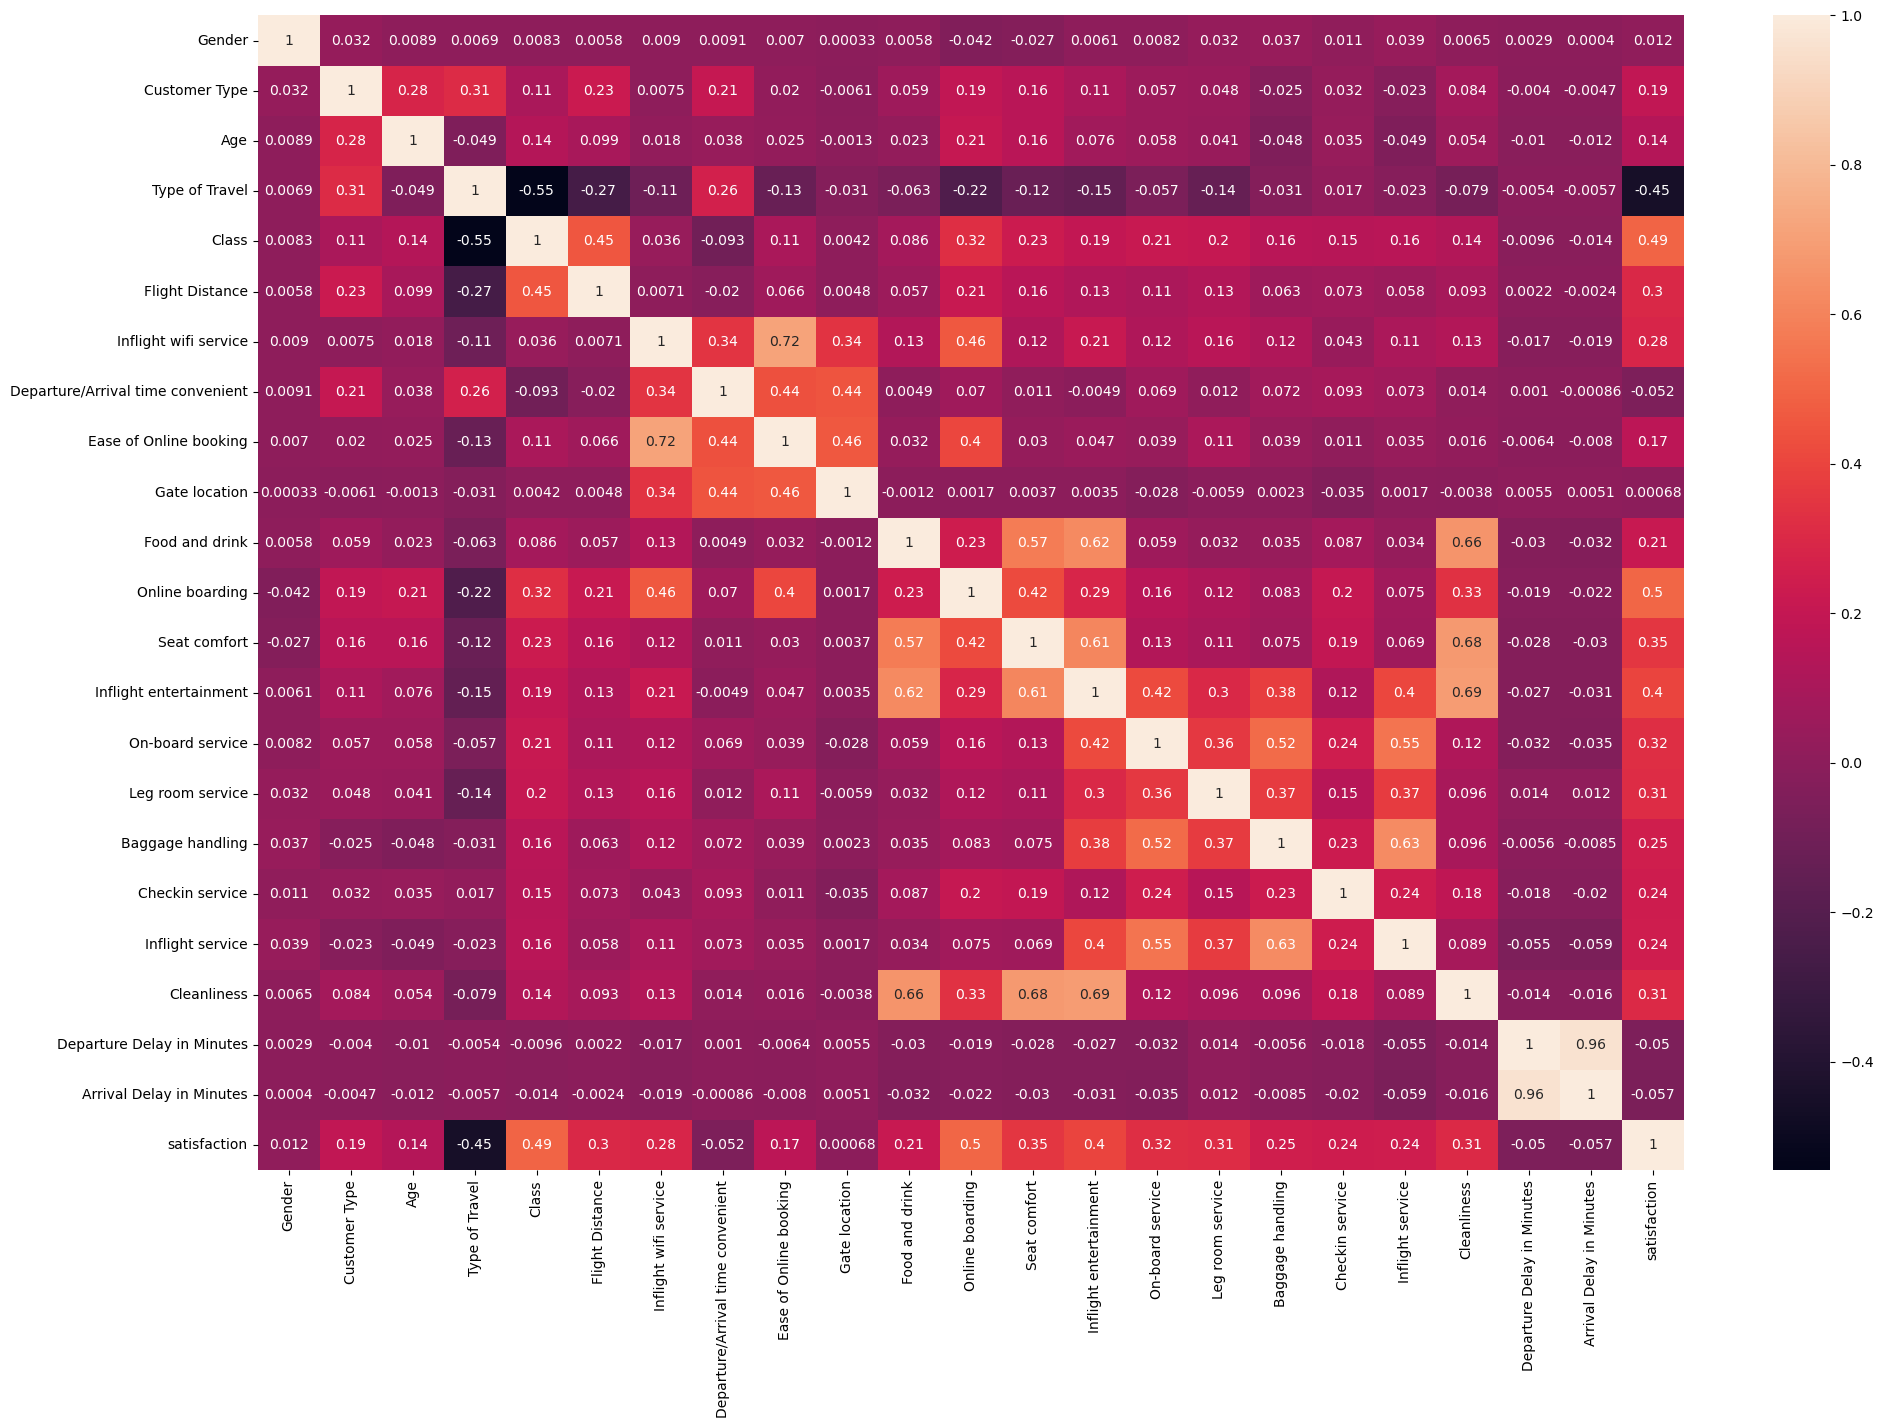

In [13]:
# heat map to check co-relation between columns

plt.figure(figsize=(23,15))#--------------to change the size
sns.heatmap(ap.corr(),annot=True);

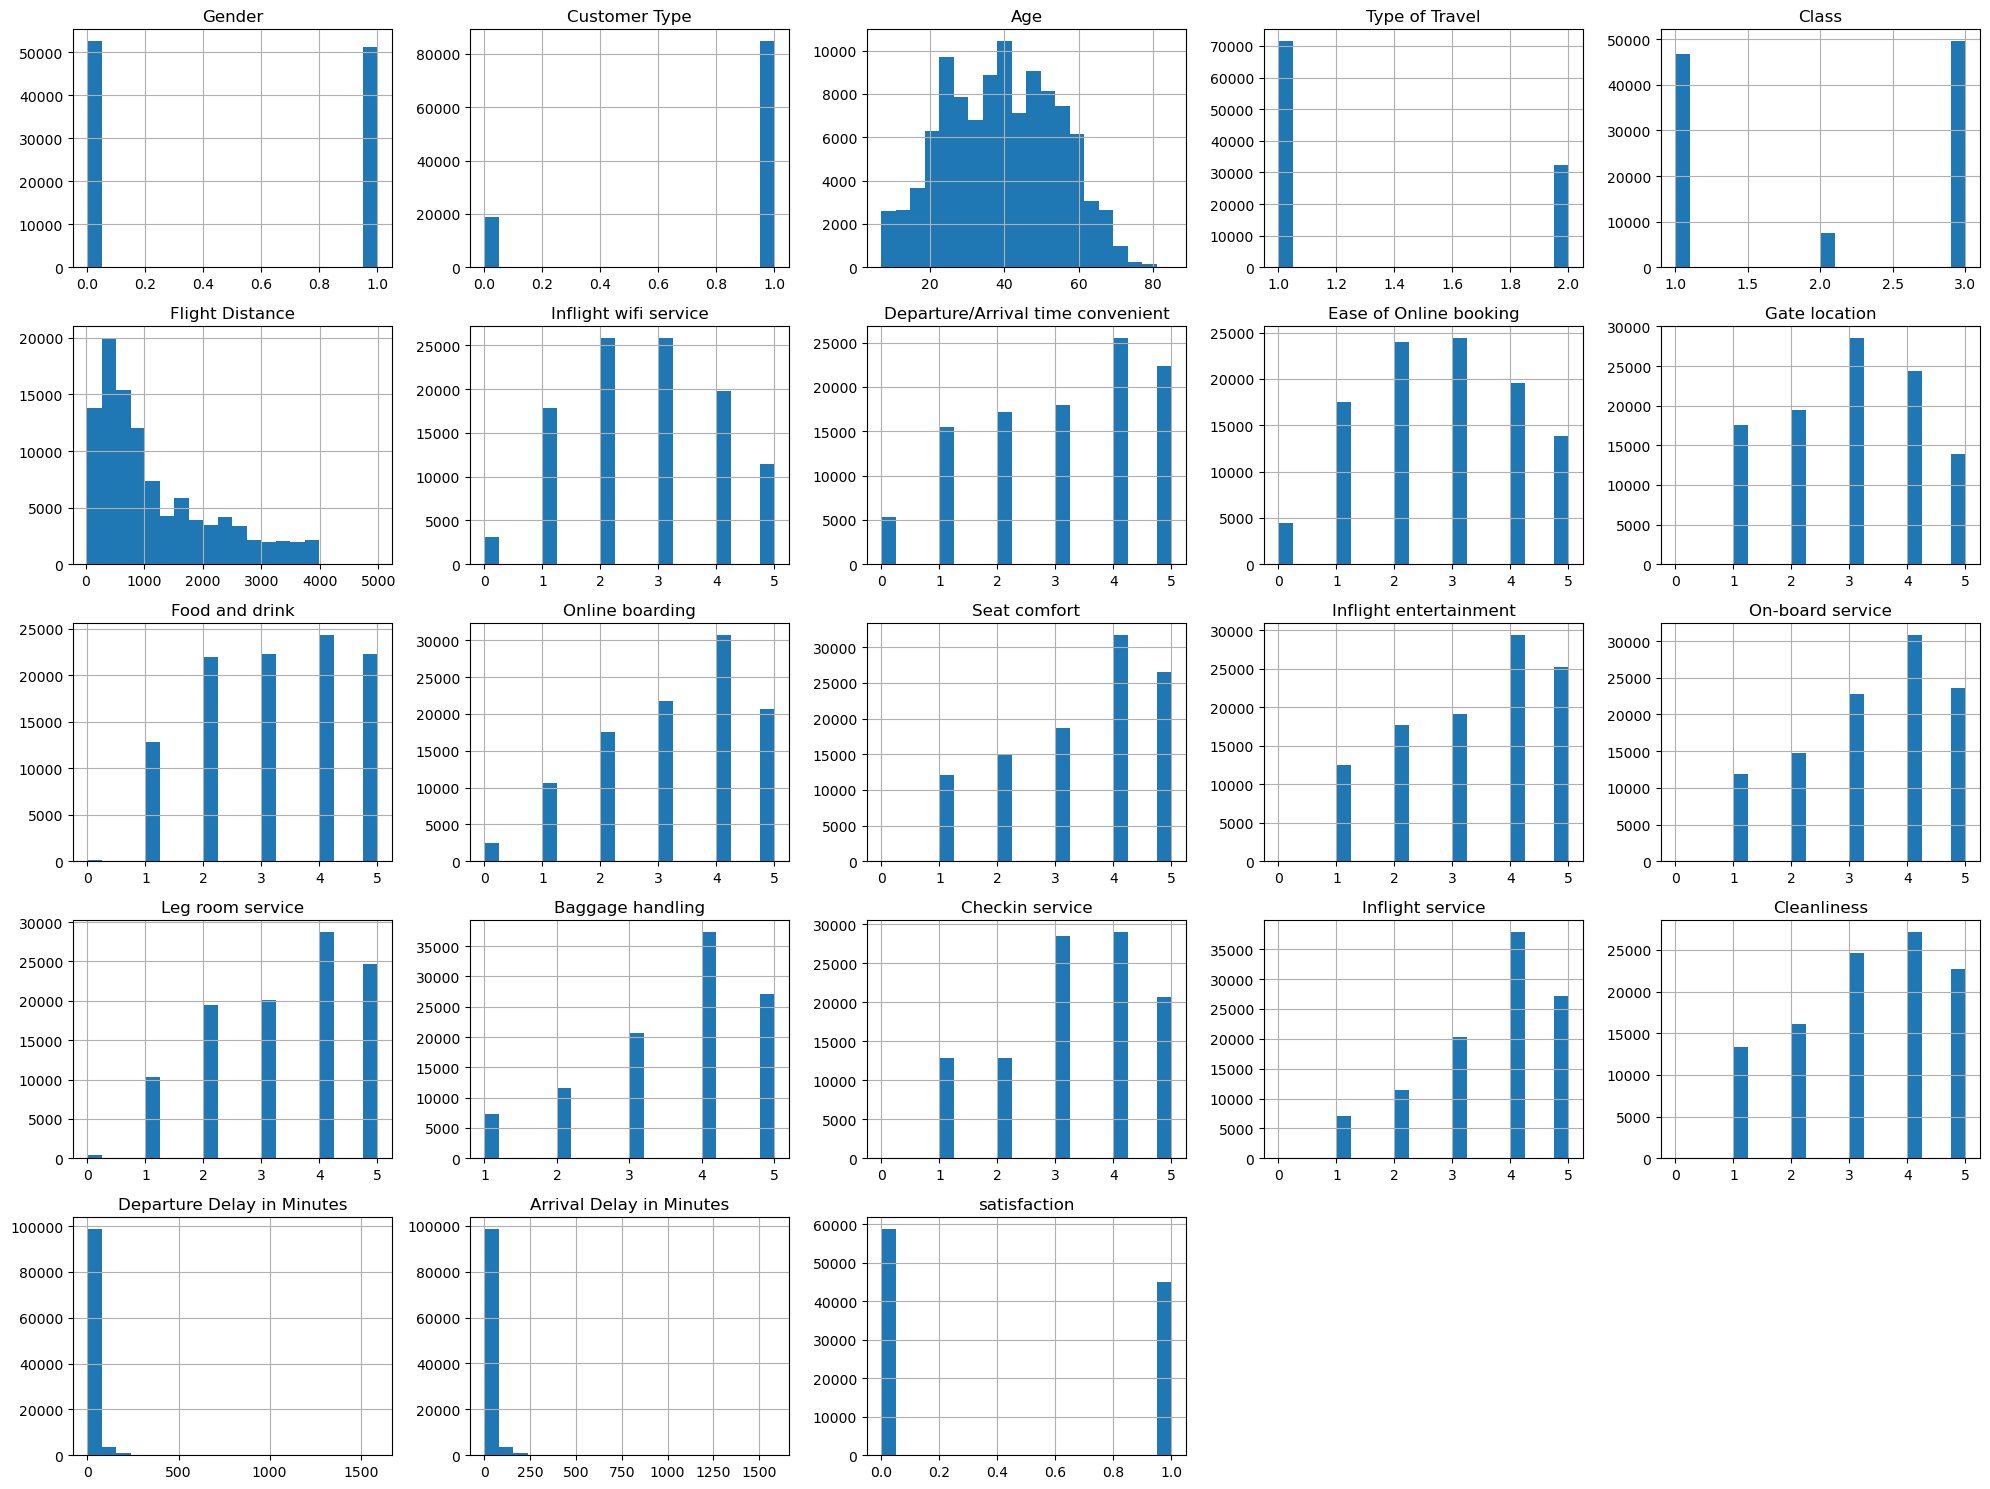

In [14]:

ap.hist(figsize=(20, 15), bins=20)
plt.tight_layout()
plt.show()

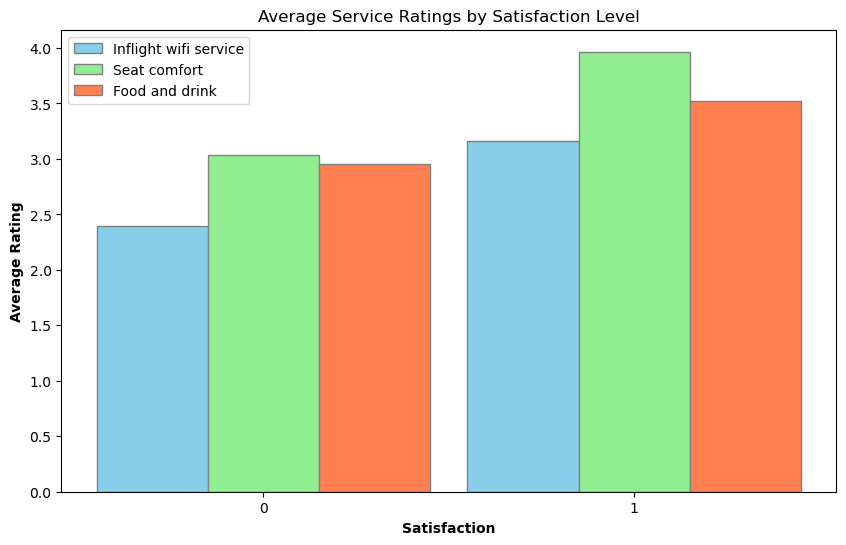

In [15]:
# Calculate average service ratings by satisfaction level
avg_ratings = ap.groupby('satisfaction')[['Inflight wifi service', 'Seat comfort', 'Food and drink']].mean().reset_index()

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
barWidth = 0.3

# Position of bars on X axis
r1 = range(len(avg_ratings))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Plotting
plt.bar(r1, avg_ratings['Inflight wifi service'], color='skyblue', width=barWidth, edgecolor='grey', label='Inflight wifi service')
plt.bar(r2, avg_ratings['Seat comfort'], color='lightgreen', width=barWidth, edgecolor='grey', label='Seat comfort')
plt.bar(r3, avg_ratings['Food and drink'], color='coral', width=barWidth, edgecolor='grey', label='Food and drink')

# Add xticks on the middle of the group bars
plt.xlabel('Satisfaction', fontweight='bold')
plt.ylabel('Average Rating', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(avg_ratings))], avg_ratings['satisfaction'])

# Create legend & Show graphic
plt.legend()
plt.title('Average Service Ratings by Satisfaction Level')
plt.show()


<Axes: xlabel='Type of Travel', ylabel='Flight Distance'>

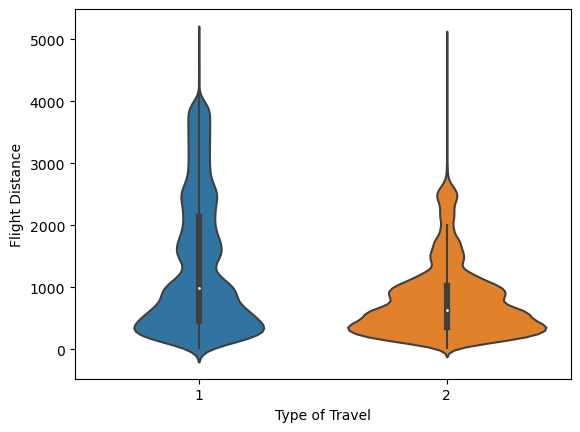

In [16]:

sns.violinplot(x='Type of Travel', y='Flight Distance', data=ap)


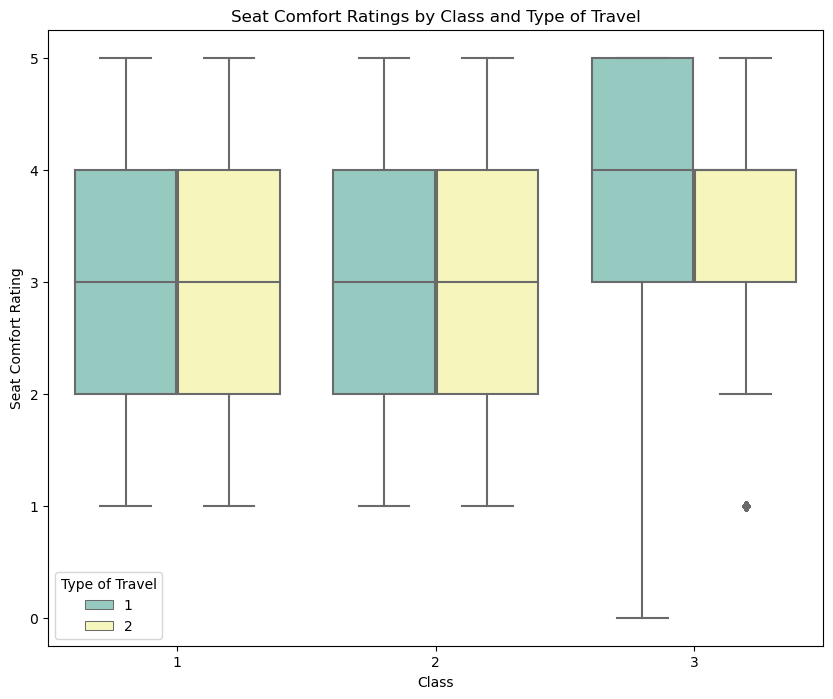

In [17]:

# Box Plot for Service Ratings
plt.figure(figsize=(10, 8))
sns.boxplot(x='Class', y='Seat comfort', data=ap, hue='Type of Travel', palette='Set3')
plt.title('Seat Comfort Ratings by Class and Type of Travel')
plt.xlabel('Class')
plt.ylabel('Seat Comfort Rating')
plt.show()

### Sampling into Train and Test

In [18]:
#80% data in train and 20% data in test
from sklearn.model_selection import train_test_split

ap_train,ap_test=train_test_split(ap,test_size=.2)


ap_train_x=ap_train.iloc[:, :-1]
ap_train_y=ap_train.iloc[:, -1]

ap_test_x=ap_test.iloc[:, :-1]
ap_test_y=ap_test.iloc[:, -1]

## MODELBUILDING 

### 1 Logistic Regression Model

In [19]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(ap_train_x,ap_train_y)

LogisticRegression()

In [20]:
pred_logreg=logreg.predict(ap_test_x)

In [21]:
# confussion Matrix 
from sklearn.metrics import confusion_matrix ,recall_score,precision_score,f1_score,accuracy_score,classification_report
tab_logreg=confusion_matrix(ap_test_y,pred_logreg)
tab_logreg=pd.DataFrame(tab_logreg)
tab_logreg.colmns=["Neutral_or_Dissatisfied","satisfied"]
tab_logreg.index=["Neutral_or_Dissatisfied","satisfied"]
tab_logreg

,0,1
Neutral_or_Dissatisfied,9719,2187
satisfied,1630,7245


In [22]:
print(classification_report(ap_test_y,pred_logreg))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84     11906
           1       0.77      0.82      0.79      8875

    accuracy                           0.82     20781
   macro avg       0.81      0.82      0.81     20781
weighted avg       0.82      0.82      0.82     20781



In [23]:
from sklearn.metrics import roc_curve,roc_auc_score

In [24]:
pred_logreg = logreg.predict_proba(ap_test_x)[:, 1]

In [25]:
Fpr,Tpr,thre=roc_curve(ap_test_y,pred_logreg)

In [26]:
# Ploting AUROC curve

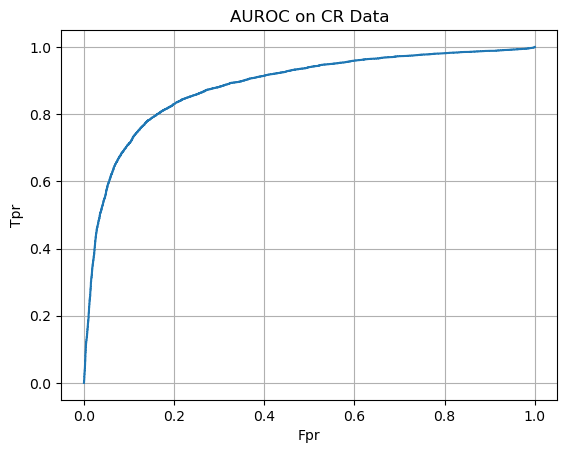

In [27]:
plt.plot(Fpr,Tpr)
plt.xlabel("Fpr")
plt.ylabel("Tpr")
plt.title("AUROC on CR Data")
plt.grid()

### 2.DecisionTree

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(class_weight="balanced",criterion="gini",max_depth=9,min_samples_split=25)

In [29]:
dt.fit(ap_train_x,ap_train_y)

DecisionTreeClassifier(class_weight='balanced', max_depth=9,
                       min_samples_split=25)

In [30]:
pred_dt=dt.predict(ap_test_x)

In [31]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV

In [32]:
Search_dict={'criterion':["gini","entropy"],
            'max_depth':range(5,10),
            "min_samples_split":range(25,30)}

In [33]:
grid=GridSearchCV(ap,param_grid=Search_dict)


In [34]:
confusion_matrix(ap_test_y,pred_dt)  

array([[11232,   674],
       [  612,  8263]], dtype=int64)

In [35]:
print(classification_report(ap_test_y,pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     11906
           1       0.92      0.93      0.93      8875

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781




### 3.Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier 
rfc=RandomForestClassifier(class_weight="balanced",criterion="gini",max_depth=9,min_samples_split=25)

In [37]:
rfc.fit(ap_train_x,ap_train_y)

RandomForestClassifier(class_weight='balanced', max_depth=9,
                       min_samples_split=25)

In [38]:
pred_rfc=rfc.predict(ap_test_x)

In [39]:
confusion_matrix(ap_test_y,pred_rfc)

array([[11254,   652],
       [  588,  8287]], dtype=int64)

In [40]:
print(classification_report(ap_test_y,pred_rfc))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     11906
           1       0.93      0.93      0.93      8875

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781



### 4.AdaBoost

In [41]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(dt,n_estimators=10)

In [42]:
abc.fit(ap_train_x,ap_train_y)

AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    max_depth=9,
                                                    min_samples_split=25),
                   n_estimators=10)

In [43]:
abc_pred=abc.predict(ap_test_x)

In [44]:
# builduing Confussion matrix
tab_ap=confusion_matrix(ap_test_y,abc_pred)
tab_ap=pd.DataFrame(tab_ap)
tab_ap.colmns=["Dissatisfied","satisfied"]
tab_ap.index=["Dissatisfied","satisfied"]
tab_ap

,0,1
Dissatisfied,11338,568
satisfied,520,8355


In [45]:
print(classification_report(ap_test_y,abc_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     11906
           1       0.94      0.94      0.94      8875

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781



### 5.Nave Baise

In [46]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [47]:
nb.fit(ap_train_x,ap_train_y)

MultinomialNB()

In [48]:
nb_pred=nb.predict(ap_test_x)

In [49]:
tab_nb=confusion_matrix(ap_test_y,abc_pred)
tab_nb=pd.DataFrame(tab_nb)
tab_nb.colmns=["Dissatisfied","satisfied"]
tab_nb.index=["Dissatisfied","satisfied"]
tab_nb

,0,1
Dissatisfied,11338,568
satisfied,520,8355


In [50]:
print(classification_report(ap_test_y,abc_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     11906
           1       0.94      0.94      0.94      8875

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781



### Conclusion:

Overall Performance: The model shows excellent performance with high precision, recall, 
    and F1-scores for both classes.
    
Accuracy: Achieving 95% accuracy is impressive and indicates robust predictive capabilities.
    
Recommendation: This model is well-suited for predicting passenger satisfaction based on the provided metrics.
However, further analysis of specific business requirements and potential biases is recommended before deploying 
the model in a real-world application.

Which Model do u Prefer....